In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from sklearn.model_selection import train_test_split

In [3]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


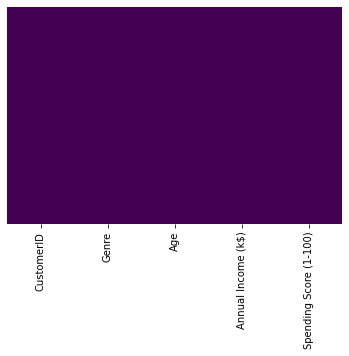

In [6]:
ax = sns.heatmap(customer_data.isnull(), yticklabels=False, cmap = 'viridis', cbar = False)

In [7]:
customer_data.columns = ["ID", "gender", "age", "income", "spending_score"]

In [8]:
customer_data.head(3)

,ID,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [9]:
customer_data.isnull().sum()

ID                0
gender            0
age               0
income            0
spending_score    0
dtype: int64

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   income          200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
customer_data.head(2)

,ID,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81


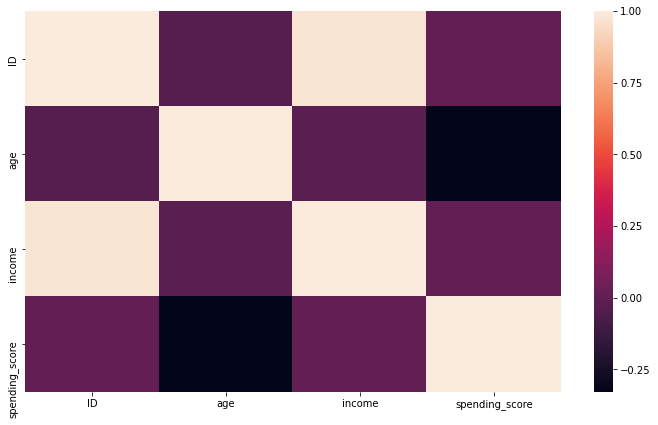

In [12]:
plt.figure(figsize=(12, 7))
corr_mat = customer_data.corr()
sns.heatmap(corr_mat)

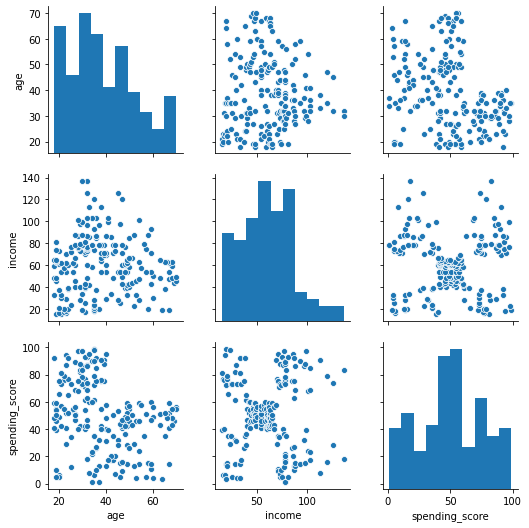

In [13]:
sns.pairplot(customer_data[customer_data.columns.drop('ID')])
plt.show()

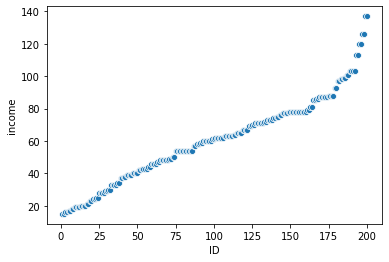

In [14]:
sns.scatterplot(customer_data["ID"], customer_data["income"])

##### Conclusion:

### Univerent Analysis

#### Spending Score

In [15]:
customer_data["spending_score"].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending_score, dtype: float64

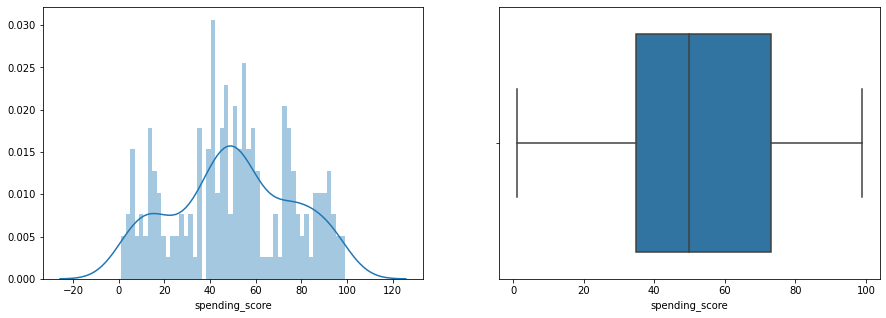

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(customer_data["spending_score"], bins=50, ax=ax[0])
sns.boxplot(customer_data["spending_score"], ax=ax[1])

#### Gender

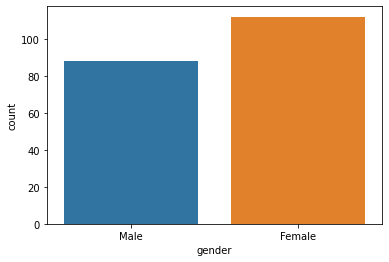

In [17]:
sns.countplot(customer_data["gender"])

In [18]:
customer_data["gender"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: gender, dtype: float64

#### Age

In [19]:
customer_data["age"].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

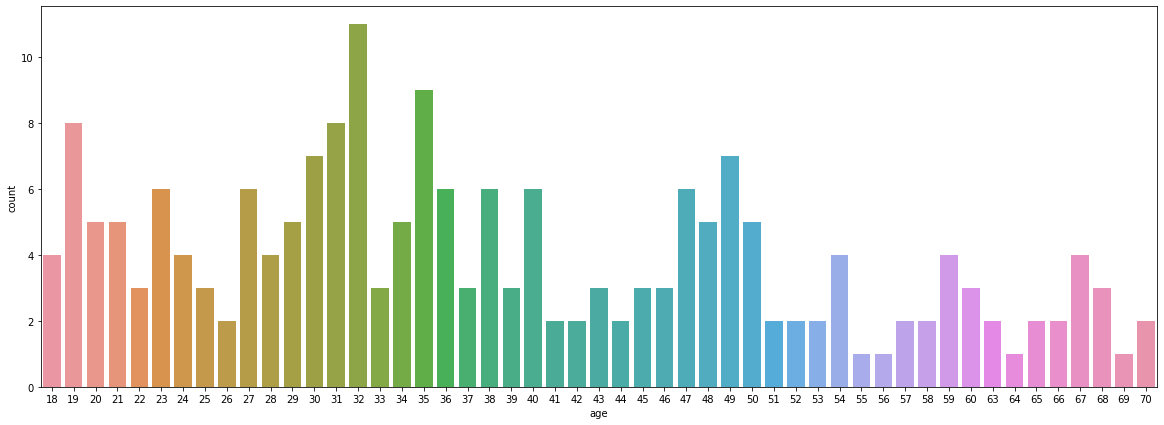

In [20]:
plt.figure(figsize=(20, 7))
sns.countplot(customer_data["age"])

#### Income

In [21]:
customer_data["income"].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

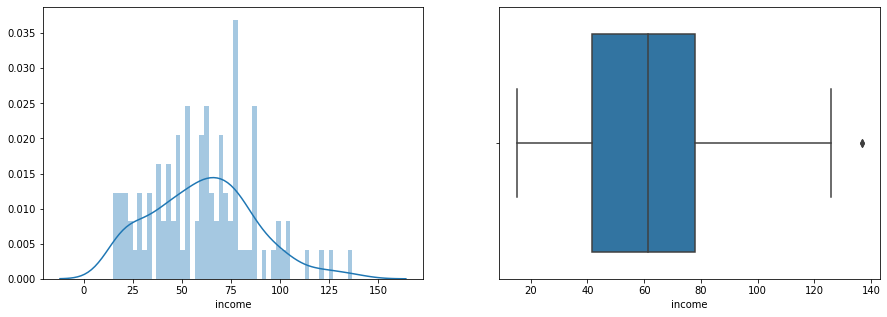

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(customer_data["income"], bins=50, ax=ax[0])
sns.boxplot(customer_data["income"], ax=ax[1])

### Multivarient Analysis

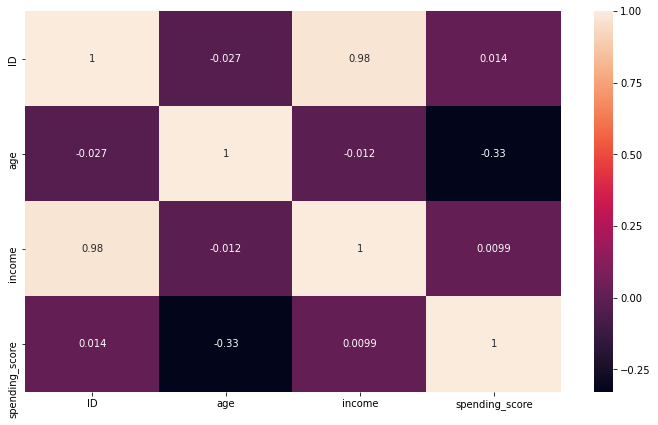

In [23]:
plt.figure(figsize=(12, 7))
corr_mat = customer_data.corr()
sns.heatmap(corr_mat, annot=True)

#### Gender

In [24]:
customer_data.groupby("gender")["spending_score"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


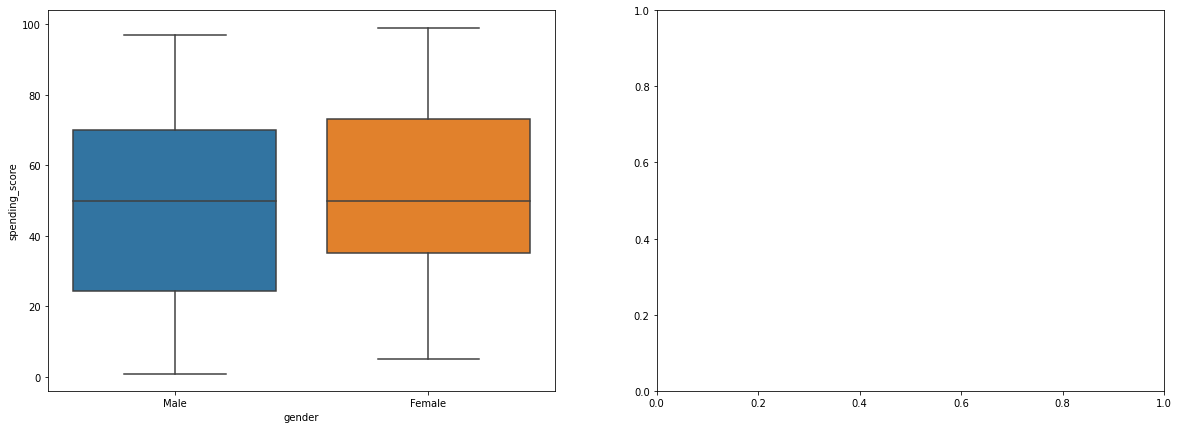

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.boxplot(customer_data["gender"], customer_data["spending_score"], ax=ax[0])
sns.kdeplot(customer_data[customer_data["gender"] == 0]["spending_score"], color='r',ax=ax[1])
sns.kdeplot(customer_data[customer_data["gender"] == 1]["spending_score"], color='g',ax=ax[1])

#### Age

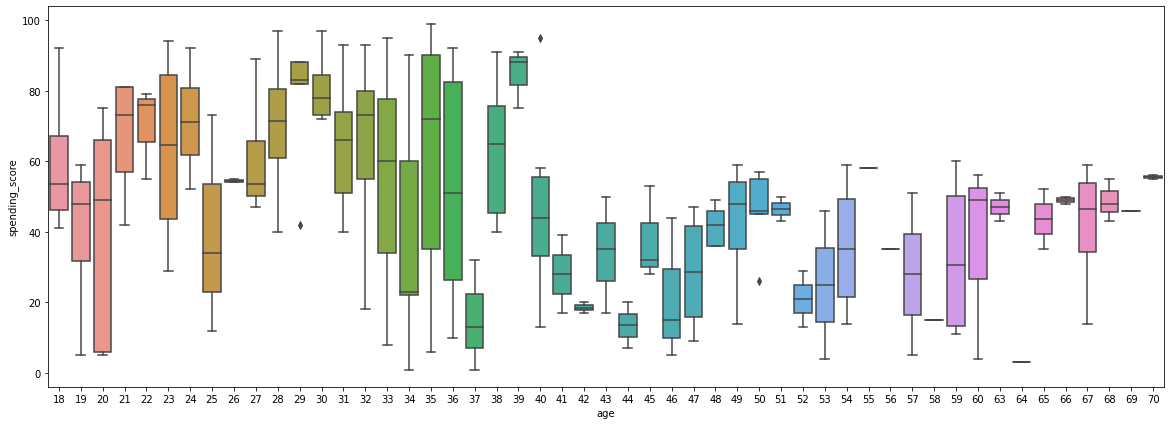

In [26]:
plt.figure(figsize=(20, 7))
sns.boxplot(customer_data["age"], customer_data["spending_score"])

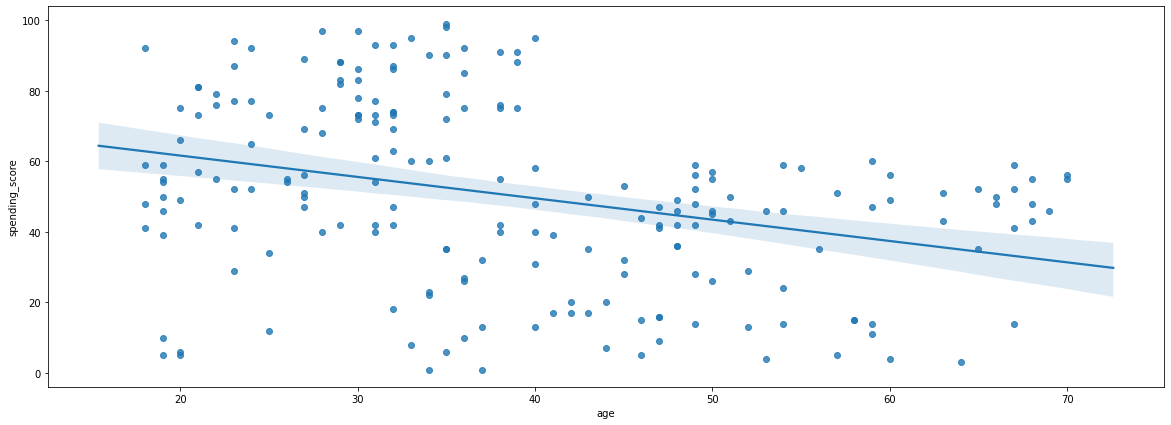

In [27]:
plt.figure(figsize=(20, 7))
sns.regplot(customer_data["age"], customer_data["spending_score"])

#### Income

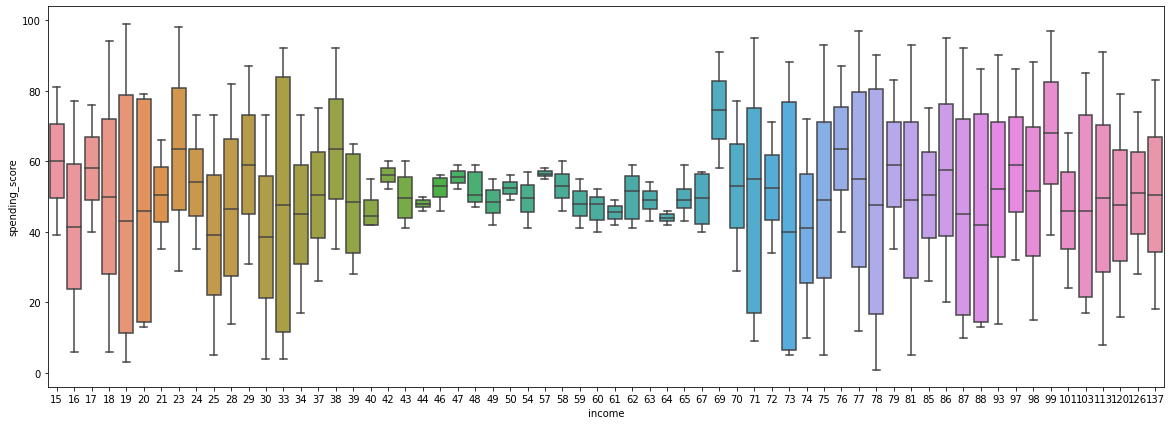

In [28]:
plt.figure(figsize=(20, 7))
sns.boxplot(customer_data["income"], customer_data["spending_score"])

<Figure size 1440x504 with 0 Axes>

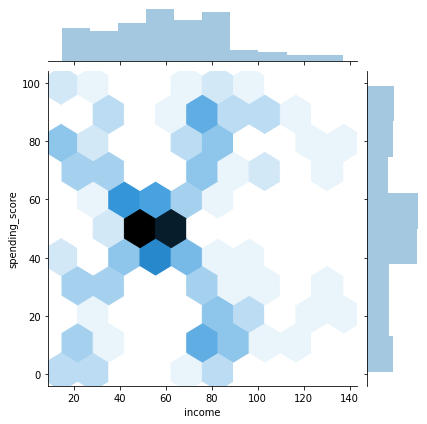

In [29]:
plt.figure(figsize=(20, 7))
sns.jointplot(customer_data["income"], customer_data["spending_score"], kind="hex")

#### Age, Income and Spending Score

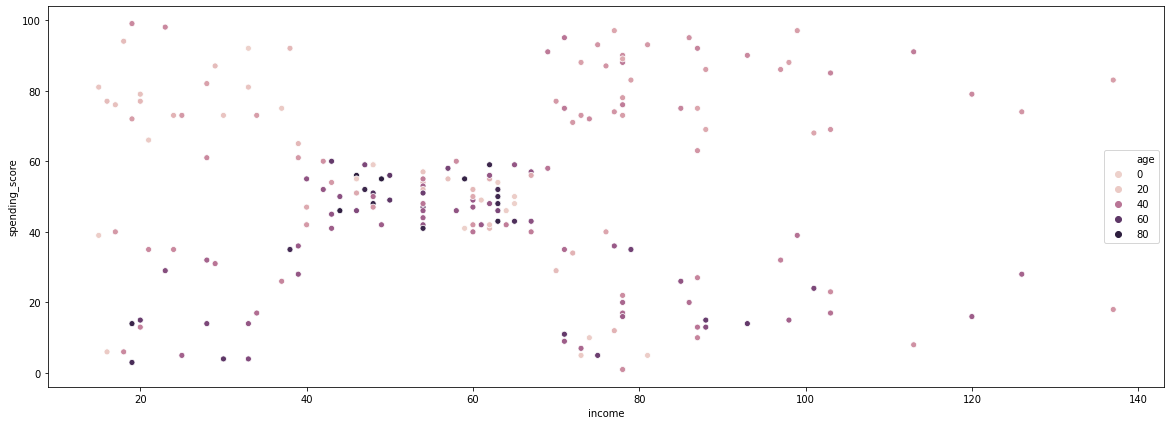

In [30]:
plt.figure(figsize=(20, 7))
sns.scatterplot(customer_data["income"], customer_data["spending_score"], hue=customer_data["age"])

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = customer_data.copy()
data["age"] = scaler.fit_transform(data["age"].values.reshape(-1, 1))
data["income"] = scaler.fit_transform(data["income"].values.reshape(-1, 1))
data["spending_score"] = scaler.fit_transform(data["spending_score"].values.reshape(-1, 1))

In [32]:
data.head()

,ID,gender,age,income,spending_score
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


### K Means Cluster Model

In [33]:
X = customer_data[['income','spending_score']].values

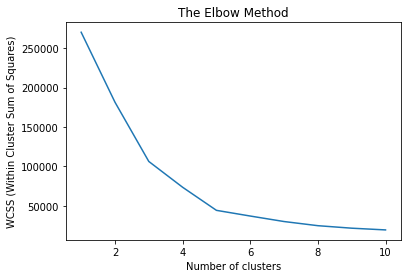

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

**Analysis**
* elbow plot pointing at 5-cluster k-means

In [35]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
pred = kmeans.fit_predict(X)

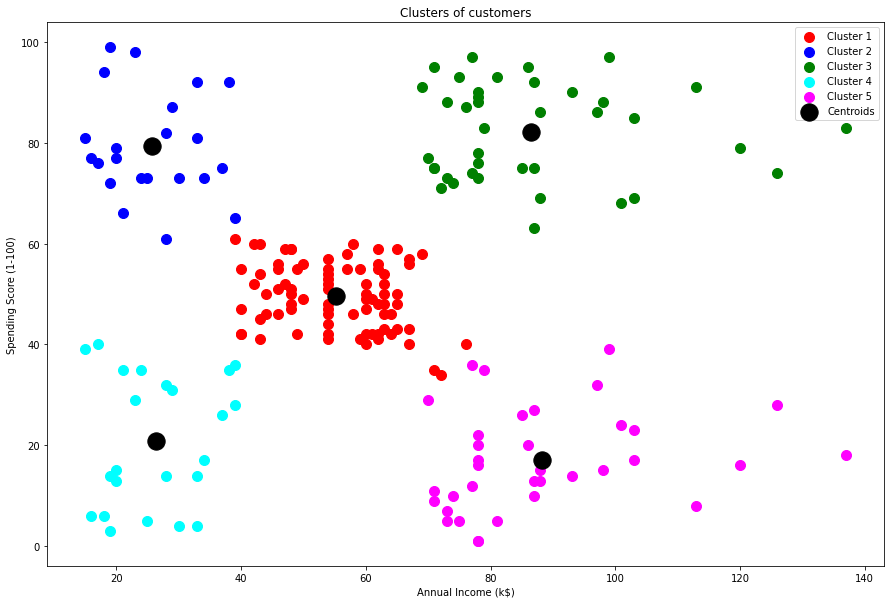

In [36]:
plt.figure(figsize=(15,10))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()